In [ ]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df_f = 'Final_df.csv'

In [ ]:
df=pd.read_csv(df_f or "/content/gdrive/My Drive/capstone project/src/Colab Notebooks/BTC_prediction/Final_df.csv")

In [ ]:
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Tweet_volume,Avg_score,Avg_score_norm,Tweet_volume_norm
0,0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402,1694.0,0.000025,0.043308,0.022462
1,1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653,3278.0,0.000021,0.032583,0.044547
2,2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143,3030.0,0.000009,0.000000,0.041089
3,3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687,5647.0,0.000055,0.129953,0.077577
4,4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886,4350.0,0.000057,0.136786,0.059494
...,...,...,...,...,...,...,...,...,...,...,...,...
431,431,2022-04-12,39533.714844,40617.585938,39388.328125,40127.183594,40127.183594,30991500854,NaN,NaN,NaN,NaN
432,432,2022-04-13,40123.570312,41430.054688,39712.746094,41166.730469,41166.730469,27691105228,18397.0,0.000058,0.137809,0.255347
433,433,2022-04-14,41160.218750,41451.480469,39695.746094,39935.515625,39935.515625,24342001973,27676.0,0.000063,0.153244,0.384722
434,434,2022-04-15,39939.402344,40617.722656,39866.832031,40553.464844,40553.464844,21756855753,40576.0,0.000075,0.185499,0.564583


In [ ]:
df.index=pd.to_datetime(df['Date'],format='%Y-%m-%d')

<AxesSubplot:xlabel='Date'>

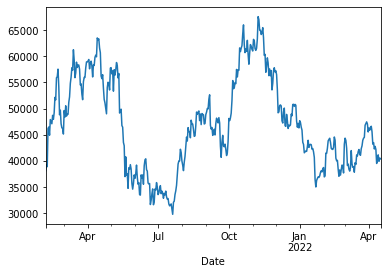

In [ ]:
temp=df['Close']
temp.plot()

<AxesSubplot:xlabel='Date'>

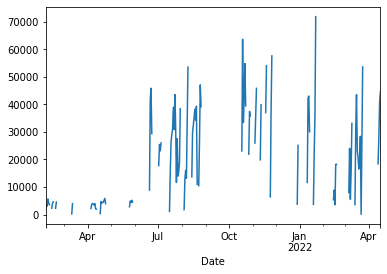

In [ ]:
df['Tweet_volume'].plot()

<AxesSubplot:xlabel='Date'>

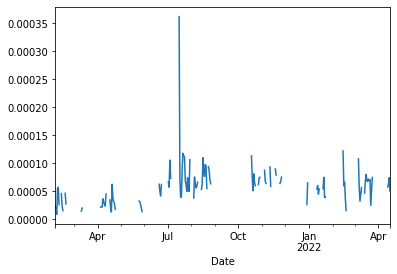

In [ ]:
df['Avg_score'].plot()

<AxesSubplot:xlabel='Date'>

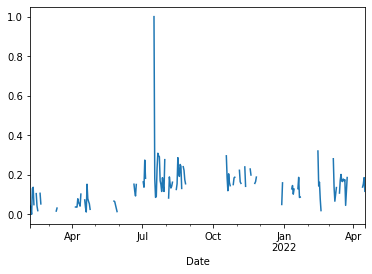

In [ ]:
df['Avg_score_norm'].plot()

<AxesSubplot:xlabel='Date'>

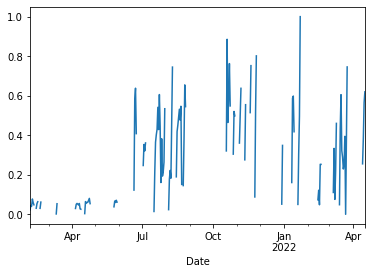

In [ ]:
df['Tweet_volume_norm'].plot()

In [ ]:
# interpolate missing values 

df.interpolate(method='time', inplace=True)

<AxesSubplot:xlabel='Date'>

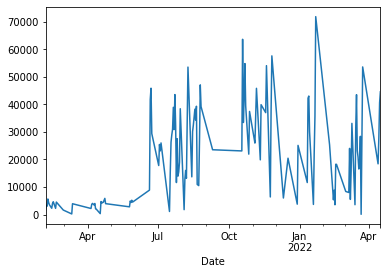

In [ ]:
df['Tweet_volume'].plot()

<AxesSubplot:xlabel='Date'>

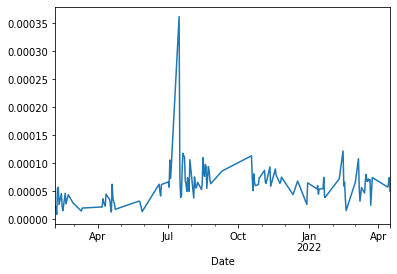

In [ ]:
df['Avg_score'].plot()

<AxesSubplot:xlabel='Date'>

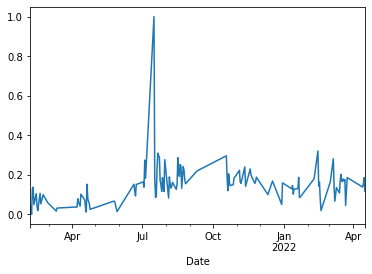

In [ ]:
df['Avg_score_norm'].plot()

<AxesSubplot:xlabel='Date'>

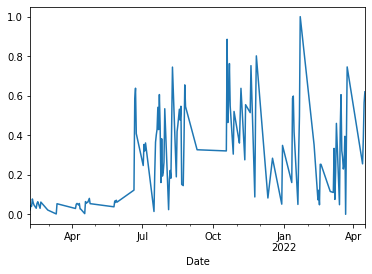

In [ ]:
df['Tweet_volume_norm'].plot()

In [ ]:
train_df = df[:int(.7*len(df))]
test_df = df[int(.7*len(df)):]

<AxesSubplot:xlabel='Date'>

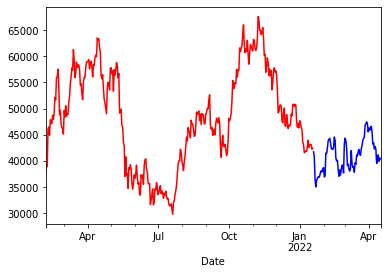

In [ ]:
train_df['Close'].plot(color='red')
test_df['Close'].plot(color='blue')

In [ ]:
#features & target for the model

features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Tweet_volume', 'Avg_score_norm']
target = ['Close']


In [ ]:
#standardize data to be of 0 mean and unit variance
# mean and std calculations should be done only on train df to ensure data doesnt' leak into testset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalerY = StandardScaler()

scaler.fit(train_df[features])
scalerY.fit(train_df[target])

StandardScaler()

In [ ]:
scaler.mean_

array([4.84950174e+04, 4.97950301e+04, 4.69952067e+04, 4.84995962e+04,
       4.41844182e+10, 1.70700517e+04, 1.46861554e-01])

In [ ]:
scaler.var_

array([8.38343169e+07, 8.49569222e+07, 8.24797643e+07, 8.34005349e+07,
       5.79455590e+20, 1.96692174e+08, 1.51399536e-02])

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]


def df_to_X_y(train, test, window_size=5):
    
    trainX = scaler.transform(train[features])
    trainY = scalerY.transform(train[target])
    
    testX = scaler.transform(test[features])
    testY = scalerY.transform(test[target])
    
    X_train = []
    Y_train  = []
    
    X_test = []
    Y_test = []
    
    
    for i in range(len(train)-window_size):
        X_train.append(trainX[i:i+window_size])
        Y_train.append(trainY[i+window_size])
        
    for  i in range(len(test)-window_size):
        X_test.append(testX[i:i+window_size])
        Y_test.append(testY[i+window_size])
        
    X_train = np.array(X_train)
    Y_train = np.array(Y_train)
    
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
    
    return (X_train, Y_train), (X_test, Y_test)    
    
    
#   df_as_np = df.to_numpy()
#   X = []
#   y = []
#   for i in range(len(df_as_np)-window_size):
#     row = [[a] for a in df_as_np[i:i+window_size]]
#     X.append(row)
#     label = df_as_np[i+window_size]
#     y.append(label)
#   return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 10

(X_train, Y_train), (X_test, Y_test) = df_to_X_y(train_df, test_df, WINDOW_SIZE)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(338, 10, 7) (338, 1)
(78, 10, 7) (78, 1)


In [ ]:
# Logistic Regression baseline model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


regressor = LinearRegression()

In [ ]:

# for logistic regression, we will have to flatten the time dimension so that the data will be 2D (N, 10*7)
# so the model will have 70 inputs and 1 output

#train
regressor.fit(X_train.reshape(-1, 10*7), Y_train)


LinearRegression()

In [ ]:
#test
predictions = regressor.predict(X_test.reshape(-1, 10*7))

loss = mse(predictions, Y_test)

print(f'MSE for Logistic Regression Baseline : {loss}')


MSE for Logistic Regression Baseline : 0.028352796572105002


In [ ]:
import matplotlib.pyplot as plt


def plot_predictions(predictions):
    #inverse scale the predictions
    predictions = scalerY.inverse_transform(predictions)
    #print(predictions.shape, test_df['Close'].shape)
    predictions = pd.DataFrame(predictions.reshape(-1).tolist(), index=test_df[:78].index)[0]
    
    
    train_df['Close'].plot(color='red')
    test_df['Close'].plot(color='blue')
    predictions.plot(color='green')
    
    
def compare_pred(predictions):
    
    predictions = scalerY.inverse_transform(predictions)
    #print(predictions.shape, test_df['Close'].shape)
    predictions = pd.DataFrame(predictions.reshape(-1).tolist(), index=test_df[:78].index)[0]
    test_df['Close'].plot(color='blue')
    predictions.plot(color='green')
    
    

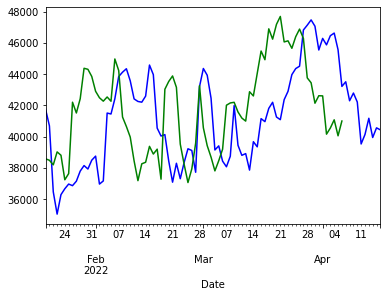

In [ ]:
compare_pred(predictions)

In [ ]:
# X_train1, y_train1 = X1[:250], y1[:250]
# X_val1, y_val1 = X1[250:300], y1[250:300]
# X_test1, y_test1 = X1[300:], y1[300:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((250, 10, 1), (250,), (50, 10, 1), (50,), (126, 10, 1), (126,))

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((10, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 9, 64)             192       
                                                                 
 flatten_3 (Flatten)         (None, 576)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 4616      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,817
Trainable params: 4,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1/8 [==>...........................] - ETA: 3s - loss: 3795894784.0000 - root_mean_squared_error: 61610.8320

8/8 [==============================] - 2s 156ms/step - loss: 663860864.0000 - root_mean_squared_error: 25765.4980 - val_loss: 12213820.0000 - val_root_mean_squared_error: 3494.8276
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 30334798.0000 - root_mean_squared_error: 5507.7036 - val_loss: 23550330.0000 - val_root_mean_squared_error: 4852.8682
Epoch 3/10
1/8 [==>...........................] - ETA: 0s - loss: 28769534.0000 - root_mean_squared_error: 5363.7241

8/8 [==============================] - 1s 125ms/step - loss: 23902236.0000 - root_mean_squared_error: 4888.9912 - val_loss: 10109715.0000 - val_root_mean_squared_error: 3179.5779
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 22315954.0000 - root_mean_squared_error: 4723.9766 - val_loss: 22285942.0000 - val_root_mean_squared_error: 4720.7988
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 17119472.0000 - root_mean_squared_error: 4137.5684 - val_loss: 22553420.0000 - val_root_mean_squared_error: 4749.0439
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 16046843.0000 - root_mean_squared_error: 4005.8511 - val_loss: 17414636.0000 - val_root_mean_squared_error: 4173.0845
Epoch 7/10
1/8 [==>...........................] - ETA: 0s - loss: 16935064.0000 - root_mean_squared_error: 4115.2236

8/8 [==============================] - 1s 104ms/step - loss: 14610059.0000 - root_mean_squared_error: 3822.3108 - val_loss: 8073815.5000 - val_root_mean_squared_error: 2841.4460
Epoch 8/10
8/8 [==============================] - 0s 7ms/step - loss: 14214535.0000 - root_mean_squared_error: 3770.2168 - val_loss: 10071846.0000 - val_root_mean_squared_error: 3173.6172
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 15329581.0000 - root_mean_squared_error: 3915.3008 - val_loss: 8210701.0000 - val_root_mean_squared_error: 2865.4321
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 12620794.0000 - root_mean_squared_error: 3552.5757 - val_loss: 9854184.0000 - val_root_mean_squared_error: 3139.1375


In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [ ]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

8/8 [==============================] - 0s 3ms/step


,Train Predictions,Actuals
0,44777.414062,47945.058594
1,45685.808594,49199.871094
2,46279.203125,52149.007812
3,47039.511719,51679.796875
4,47666.292969,55888.132812
...,...,...
245,56955.886719,62026.078125
246,58022.562500,64261.992188
247,58249.316406,65992.835938
248,59613.136719,62210.171875


In [ ]:
model3 = Sequential()
model3.add(InputLayer((10, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                12864     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
7/8 [=========================>....] - ETA: 0s - loss: 2278756352.0000 - root_mean_squared_error: 47736.3203 

8/8 [==============================] - 7s 670ms/step - loss: 2294205696.0000 - root_mean_squared_error: 47897.8672 - val_loss: 3462035456.0000 - val_root_mean_squared_error: 58839.0625
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 2293806336.0000 - root_mean_squared_error: 47893.6992

8/8 [==============================] - 4s 573ms/step - loss: 2293806336.0000 - root_mean_squared_error: 47893.6992 - val_loss: 3461475328.0000 - val_root_mean_squared_error: 58834.3047
Epoch 3/10
6/8 [=====================>........] - ETA: 0s - loss: 2321169408.0000 - root_mean_squared_error: 48178.5156

8/8 [==============================] - 4s 622ms/step - loss: 2293313792.0000 - root_mean_squared_error: 47888.5547 - val_loss: 3460787456.0000 - val_root_mean_squared_error: 58828.4570
Epoch 4/10
6/8 [=====================>........] - ETA: 0s - loss: 2261992448.0000 - root_mean_squared_error: 47560.4102

8/8 [==============================] - 4s 595ms/step - loss: 2292709120.0000 - root_mean_squared_error: 47882.2422 - val_loss: 3459952128.0000 - val_root_mean_squared_error: 58821.3594
Epoch 5/10
7/8 [=========================>....] - ETA: 0s - loss: 2287533824.0000 - root_mean_squared_error: 47828.1680

8/8 [==============================] - 5s 657ms/step - loss: 2291988992.0000 - root_mean_squared_error: 47874.7227 - val_loss: 3458946048.0000 - val_root_mean_squared_error: 58812.8047
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 2376035328.0000 - root_mean_squared_error: 48744.5938

8/8 [==============================] - 4s 600ms/step - loss: 2291119104.0000 - root_mean_squared_error: 47865.6367 - val_loss: 3457759744.0000 - val_root_mean_squared_error: 58802.7188
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 2290101504.0000 - root_mean_squared_error: 47855.0039

8/8 [==============================] - 4s 563ms/step - loss: 2290101504.0000 - root_mean_squared_error: 47855.0039 - val_loss: 3456378112.0000 - val_root_mean_squared_error: 58790.9688
Epoch 8/10
7/8 [=========================>....] - ETA: 0s - loss: 2266301440.0000 - root_mean_squared_error: 47605.6875

8/8 [==============================] - 5s 682ms/step - loss: 2288923136.0000 - root_mean_squared_error: 47842.6914 - val_loss: 3454790912.0000 - val_root_mean_squared_error: 58777.4688
Epoch 9/10
8/8 [==============================] - ETA: 0s - loss: 2287579136.0000 - root_mean_squared_error: 47828.6445

8/8 [==============================] - 4s 591ms/step - loss: 2287579136.0000 - root_mean_squared_error: 47828.6445 - val_loss: 3452985600.0000 - val_root_mean_squared_error: 58762.1094
Epoch 10/10
7/8 [=========================>....] - ETA: 0s - loss: 2284933888.0000 - root_mean_squared_error: 47800.9805

8/8 [==============================] - 5s 662ms/step - loss: 2286058752.0000 - root_mean_squared_error: 47812.7461 - val_loss: 3450958080.0000 - val_root_mean_squared_error: 58744.8555


In [ ]:
temp_df = pd.DataFrame({'Close':temp})

In [ ]:
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Close,Seconds
Date,,
2021-02-05,38144.308594,1.612483e+09
2021-02-06,39266.011719,1.612570e+09
2021-02-07,38903.441406,1.612656e+09
2021-02-08,46196.464844,1.612742e+09
2021-02-09,46481.105469,1.612829e+09
...,...,...
2022-04-12,40127.183594,1.649722e+09
2022-04-13,41166.730469,1.649808e+09
2022-04-14,39935.515625,1.649894e+09


In [ ]:
day = 60*60*24
year = 365.2425*day
temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()


,Close,Seconds,Day sin,Day cos,Year sin,Year cos
Date,,,,,,
2021-02-05,38144.308594,1.612483e+09,-1.082352e-12,1.0,0.575306,0.817938
2021-02-06,39266.011719,1.612570e+09,-1.133573e-11,1.0,0.589291,0.807921
2021-02-07,38903.441406,1.612656e+09,-7.037190e-12,1.0,0.603101,0.797665
2021-02-08,46196.464844,1.612742e+09,-2.738651e-12,1.0,0.616734,0.787172
2021-02-09,46481.105469,1.612829e+09,-1.299203e-11,1.0,0.630183,0.776447


In [ ]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Close,Day sin,Day cos,Year sin,Year cos
Date,,,,,
2021-02-05,38144.308594,-1.082352e-12,1.0,0.575306,0.817938
2021-02-06,39266.011719,-1.133573e-11,1.0,0.589291,0.807921
2021-02-07,38903.441406,-7.037190e-12,1.0,0.603101,0.797665
2021-02-08,46196.464844,-2.738651e-12,1.0,0.616734,0.787172
2021-02-09,46481.105469,-1.299203e-11,1.0,0.630183,0.776447


In [ ]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((430, 6, 5), (430,))

In [ ]:
X2_train, y2_train = X2[:250], y2[:250]
X2_val, y2_val = X2[250:300], y2[250:300]
X2_test, y2_test = X2[300:], y2[300:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((250, 6, 5), (250,), (50, 6, 5), (50,), (130, 6, 5), (130,))

In [ ]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [ ]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.13034825e+00, -6.64122054e-12,  1.00000000e+00,
         -4.87631013e-01,  8.73049824e-01],
        [ 8.03445435e-01, -2.34268192e-12,  1.00000000e+00,
         -4.72540721e-01,  8.81308838e-01],
        [ 3.04214986e-01, -1.25960585e-11,  1.00000000e+00,
         -4.57310590e-01,  8.89307047e-01],
        [ 3.23303570e-01, -8.29751990e-12,  1.00000000e+00,
         -4.41945128e-01,  8.97042086e-01],
        [ 4.61097473e-01, -3.99898128e-12,  1.00000000e+00,
         -4.26448882e-01,  9.04511664e-01],
        [ 4.74432209e-01,  2.99557344e-13,  1.00000000e+00,
         -4.10826438e-01,  9.11713572e-01]],

       [[ 8.03445435e-01, -2.34268192e-12,  1.00000000e+00,
         -4.72540721e-01,  8.81308838e-01],
        [ 3.04214986e-01, -1.25960585e-11,  1.00000000e+00,
         -4.57310590e-01,  8.89307047e-01],
        [ 3.23303570e-01, -8.29751990e-12,  1.00000000e+00,
         -4.41945128e-01,  8.97042086e-01],
        [ 4.61097473e-01, -3.99898128e-12,  1.00000000e+00,
  

In [ ]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1/8 [==>...........................] - ETA: 16s - loss: 2301339392.0000 - root_mean_squared_error: 47972.2773

8/8 [==============================] - 9s 881ms/step - loss: 2266704640.0000 - root_mean_squared_error: 47609.9219 - val_loss: 3592812288.0000 - val_root_mean_squared_error: 59940.0742
Epoch 2/10
1/8 [==>...........................] - ETA: 0s - loss: 2173379840.0000 - root_mean_squared_error: 46619.5234

8/8 [==============================] - 5s 748ms/step - loss: 2265853184.0000 - root_mean_squared_error: 47600.9805 - val_loss: 3591576064.0000 - val_root_mean_squared_error: 59929.7578
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 2264883712.0000 - root_mean_squared_error: 47590.7930

8/8 [==============================] - 7s 950ms/step - loss: 2264883712.0000 - root_mean_squared_error: 47590.7930 - val_loss: 3590121472.0000 - val_root_mean_squared_error: 59917.6211
Epoch 4/10
7/8 [=========================>....] - ETA: 0s - loss: 2260448256.0000 - root_mean_squared_error: 47544.1719

8/8 [==============================] - 6s 849ms/step - loss: 2263584512.0000 - root_mean_squared_error: 47577.1445 - val_loss: 3588151808.0000 - val_root_mean_squared_error: 59901.1836
Epoch 5/10
1/8 [==>...........................] - ETA: 0s - loss: 2203191296.0000 - root_mean_squared_error: 46938.1641

8/8 [==============================] - 5s 661ms/step - loss: 2261852160.0000 - root_mean_squared_error: 47558.9336 - val_loss: 3585615872.0000 - val_root_mean_squared_error: 59880.0117
Epoch 6/10
1/8 [==>...........................] - ETA: 0s - loss: 2318609920.0000 - root_mean_squared_error: 48151.9453

8/8 [==============================] - 5s 773ms/step - loss: 2259671040.0000 - root_mean_squared_error: 47535.9961 - val_loss: 3582456576.0000 - val_root_mean_squared_error: 59853.6250
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 2256974080.0000 - root_mean_squared_error: 47507.6172

8/8 [==============================] - 5s 677ms/step - loss: 2256974080.0000 - root_mean_squared_error: 47507.6172 - val_loss: 3578644480.0000 - val_root_mean_squared_error: 59821.7734
Epoch 8/10
6/8 [=====================>........] - ETA: 0s - loss: 2254245632.0000 - root_mean_squared_error: 47478.8984

8/8 [==============================] - 5s 724ms/step - loss: 2253767424.0000 - root_mean_squared_error: 47473.8594 - val_loss: 3574130176.0000 - val_root_mean_squared_error: 59784.0312
Epoch 9/10
7/8 [=========================>....] - ETA: 0s - loss: 2249810688.0000 - root_mean_squared_error: 47432.1680

8/8 [==============================] - 8s 1s/step - loss: 2249993728.0000 - root_mean_squared_error: 47434.0977 - val_loss: 3568899584.0000 - val_root_mean_squared_error: 59740.2695
Epoch 10/10
1/8 [==>...........................] - ETA: 0s - loss: 2389540608.0000 - root_mean_squared_error: 48882.9258

8/8 [==============================] - 5s 755ms/step - loss: 2245676288.0000 - root_mean_squared_error: 47388.5664 - val_loss: 3562918912.0000 - val_root_mean_squared_error: 59690.1914


5/5 [==============================] - 0s 9ms/step


(     Predictions       Actuals
 0     256.346558  50504.796875
 1     256.340820  47672.121094
 2     256.331604  47243.304688
 3     256.332245  49362.507812
 4     256.334808  50098.335938
 ..           ...           ...
 125   256.362427  40127.183594
 126   256.362823  41166.730469
 127   256.362335  39935.515625
 128   256.362823  40553.464844
 129   256.362427  40424.484375
 
 [130 rows x 2 columns], 1824343410.3199391)

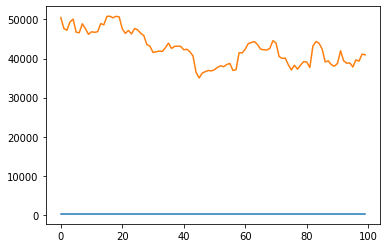

In [ ]:

import matplotlib.pyplot as plt
plot_predictions1(model4, X2_test, y2_test)

In [ ]:
p_temp_df = pd.concat([df['Avg_score_norm'], temp_df], axis=1)
p_temp_df.head()
p_temp_df.dropna()

,Avg_score_norm,Close,Day sin,Day cos,Year sin,Year cos
Date,,,,,,
2021-02-05,0.043308,38144.308594,-1.082352e-12,1.0,0.575306,0.817938
2021-02-06,0.032583,39266.011719,-1.133573e-11,1.0,0.589291,0.807921
2021-02-07,0.000000,38903.441406,-7.037190e-12,1.0,0.603101,0.797665
2021-02-08,0.129953,46196.464844,-2.738651e-12,1.0,0.616734,0.787172
2021-02-09,0.136786,46481.105469,-1.299203e-11,1.0,0.630183,0.776447
...,...,...,...,...,...,...
2022-03-24,0.186075,43960.933594,-5.418097e-12,1.0,0.988248,0.152858
2022-04-13,0.137809,41166.730469,-6.758816e-12,1.0,0.981891,-0.189444
2022-04-14,0.153244,39935.515625,-2.460278e-12,1.0,0.978487,-0.206307


In [ ]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X3, y3 = df_to_X_y3(p_temp_df)

In [ ]:
X3_train, y3_train = X3[:70], y3[:70]
X3_val, y3_val = X3[70:100], y3[70:100]
X3_test, y3_test = X3[100:], y3[100:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((70, 7, 6), (70, 2), (30, 7, 6), (30, 2), (329, 7, 6), (329, 2))

In [ ]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3



In [ ]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [ ]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[        nan, -3.72374937],
       [        nan, -2.97616495],
       [        nan, -3.03386803],
       [        nan, -2.86442451],
       [        nan, -3.02726752],
       [        nan, -3.5476482 ],
       [        nan, -3.75310179],
       [        nan, -3.55134805],
       [        nan, -3.23700941],
       [        nan, -3.36009279],
       [        nan, -3.1909765 ],
       [        nan, -2.88065383],
       [        nan, -3.32029902],
       [        nan, -3.57531617],
       [        nan, -3.51634716],
       [        nan, -3.95358218],
       [        nan, -3.97031312],
       [        nan, -3.23467938],
       [        nan, -3.35673576],
       [        nan, -3.2367163 ],
       [        nan, -3.57521006],
       [        nan, -2.90172203],
       [        nan, -2.688845  ],
       [        nan, -2.65317108],
       [        nan, -3.04434648],
       [        nan, -3.10011208],
       [        nan, -3.5306197 ],
       [        nan, -3.56317479],
       [        nan,

In [ ]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

In [ ]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
3/3 [==============================] - 3s 350ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 2/10
3/3 [==============================] - 0s 26ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 3/10
3/3 [==============================] - 0s 28ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 4/10
3/3 [==============================] - 0s 27ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 5/10
3/3 [==============================] - 0s 26ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 6/10
3/3 [==============================] - 0s 25ms/step - loss: nan - root_mean_squared_error: nan - val_loss: nan - val_root_mean_squared_error: nan
Epoch 7/10
3/3 [==============================] - 0s 33ms

In [ ]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Close Predictions': temp_preds,
                          'Close Actuals':temp_actuals,
                          'Score Predictions': p_preds,
                          'Score Actuals': p_actuals
                          })
  plt.plot(df['Close Predictions'][start:end])
  plt.plot(df['Close Actuals'][start:end])
  plt.plot(df['Score Predictions'][start:end])
  plt.plot(df['Score Actuals'][start:end])
  return df[start:end]

11/11 [==============================] - 0s 6ms/step


,Close Predictions,Close Actuals,Score Predictions,Score Actuals
0,NaN,34770.582031,NaN,NaN
1,NaN,38705.980469,NaN,NaN
2,NaN,38402.222656,NaN,0.066916
3,NaN,39294.199219,NaN,0.063790
4,NaN,38436.968750,NaN,0.047872
...,...,...,...,...
95,NaN,46942.218750,NaN,0.154637
96,NaN,49058.667969,NaN,NaN
97,NaN,48902.402344,NaN,NaN
98,NaN,48829.832031,NaN,NaN


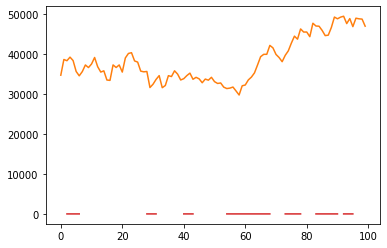

In [ ]:
plot_predictions2(model5, X3_test, y3_test)